In [150]:
import pandas as pd

df = pd.read_csv("data/DB_3.csv", sep="\t")  # Разделить табуляция, А НЕ ЗАЯПЯТАЯ!!!
normal_columns = []
for i in df:
    normal_columns.append(
        i.strip("\t")
    )  # В данный момент мы удаляем табуляцию из колонок


print(normal_columns)


df.columns = normal_columns

df = df.drop(columns=["Unnamed: 15"])  # Удаляем странную колонку
normal_columns.pop()  # Удаляем её и из нашего списка с колонками, на самом деле её можно и не вести дальше по ходу

['user_id', 'age', 'gender', 'occupation', 'work_mode', 'screen_time_hours', 'work_screen_hours', 'leisure_screen_hours', 'sleep_hours', 'sleep_quality_1_5', 'stress_level_0_10', 'productivity_0_100', 'exercise_minutes_per_week', 'social_hours_per_week', 'mental_wellness_index_0_100', 'Unnamed: 15']


'Unnamed: 15'

In [151]:
for i in normal_columns:
    if df[i].dtypes == "object": # Object - удаляем, т.к не знаем чем ЧЕЛ занимался
        print(i)
        df = df.dropna(subset=[i])
    else:
        df[i] = df[i].fillna(df[i].mean()) # А в случае цифр мы можем поставить среднее, таким образом
        # Не теряя данные в строке для остальных столбцов!!!...
    unique = df[i].unique()
    if len(unique) < 40:
        print(i, unique)
    print(i, df[i].unique().min(), df[i].unique().max()) # Здесь глядим чтобы данные в столбцах 
    # productivity_0_100 были в действительности от 0 до 100
    

user_id
user_id U0001 U0400
age [33 28 35 42 36 26 34 31 16 25 21 32 22 18 41 30 20 27 44 29 19 24 38 37
 23 40 45 49 39 47 17 51 60 48 46 43]
age 16 60
gender
gender ['Female' 'Male' 'Non-binary/Other']
gender Female Non-binary/Other
occupation
occupation ['Employed' 'Student' 'Self-employed' 'Retired' 'Unemployed']
occupation Employed Unemployed
work_mode
work_mode ['Remote' 'In-person' 'Hybrid']
work_mode Hybrid Remote
screen_time_hours 1.0 19.17
work_screen_hours 0.11 12.04
leisure_screen_hours 0.89 13.35
sleep_hours 4.64 9.74
sleep_quality_1_5 [1.         3.         2.         4.         1.40512821]
sleep_quality_1_5 1.0 4.0
stress_level_0_10 0.0 10.0
productivity_0_100 20.6 100.0
exercise_minutes_per_week 0 372
social_hours_per_week 0.0 23.9
mental_wellness_index_0_100 0.0 97.0


In [152]:
df.isna().sum() # Мы замечательно справились с удаление пропусков и теперь машинное обучение будет работать !!!

user_id                        0
age                            0
gender                         0
occupation                     0
work_mode                      0
screen_time_hours              0
work_screen_hours              0
leisure_screen_hours           0
sleep_hours                    0
sleep_quality_1_5              0
stress_level_0_10              0
productivity_0_100             0
exercise_minutes_per_week      0
social_hours_per_week          0
mental_wellness_index_0_100    0
dtype: int64

In [153]:
print(len(df) == len(df.drop_duplicates(subset=['user_id'])))
df = df.drop_duplicates(subset=['user_id']) # Удаляем дупликаты, т.к этот столбец должен быть один

False


In [154]:
df.describe() # Мы посмотрели распределение данных, возможные выбросы

,age,screen_time_hours,work_screen_hours,leisure_screen_hours,sleep_hours,sleep_quality_1_5,stress_level_0_10,productivity_0_100,exercise_minutes_per_week,social_hours_per_week,mental_wellness_index_0_100
count,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000
mean,29.807692,8.998952,2.164466,6.830070,7.024718,1.402078,8.119550,54.510000,109.943590,7.950256,20.533982
std,7.482040,2.493150,1.916255,2.224259,0.849946,0.655760,2.097821,15.073848,69.702319,4.924681,20.327554
min,16.000000,1.000000,0.110000,0.890000,4.640000,1.000000,0.000000,20.600000,0.000000,0.000000,0.000000
25%,24.000000,7.342500,0.700000,5.460000,6.402500,1.000000,6.900000,43.700000,58.250000,4.600000,4.025000
50%,30.000000,9.030000,1.455000,6.700000,7.065000,1.000000,8.700000,52.050000,103.000000,7.800000,15.550000
75%,35.000000,10.462500,3.005000,8.310000,7.640000,2.000000,10.000000,63.225000,157.000000,11.100000,30.750000
max,60.000000,19.170000,12.040000,13.350000,9.740000,4.000000,10.000000,100.000000,372.000000,23.900000,97.000000


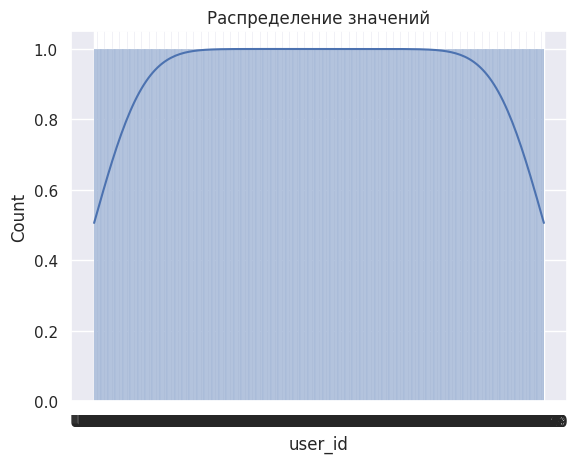

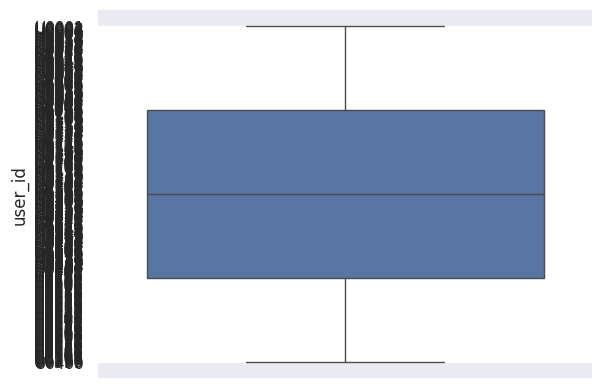

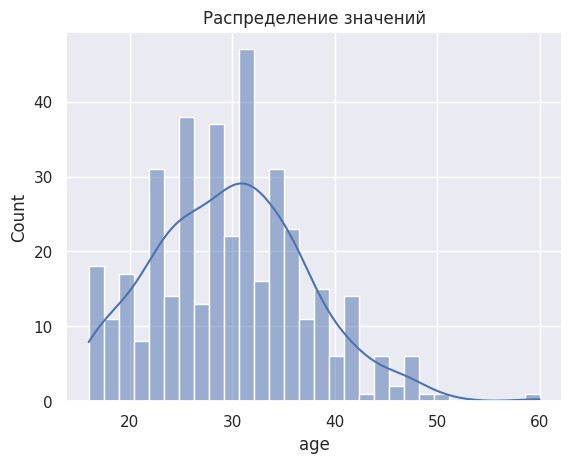

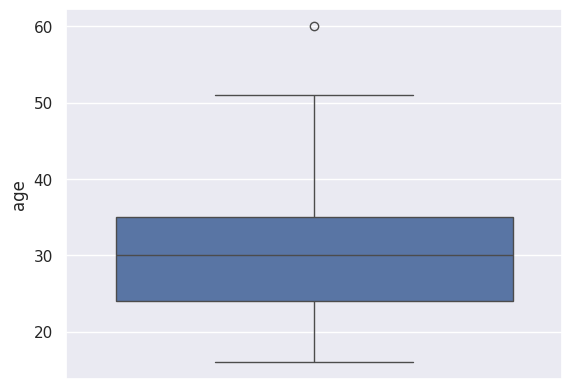

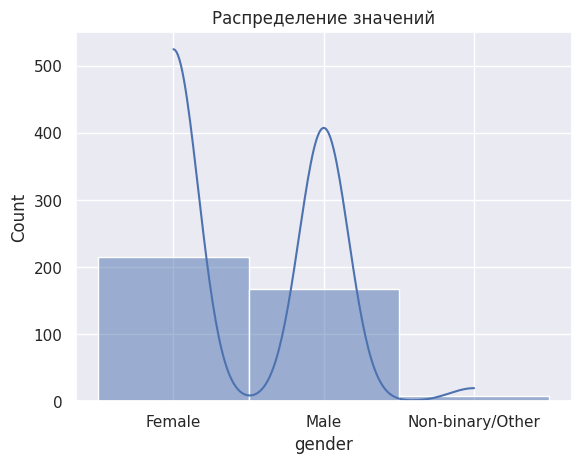

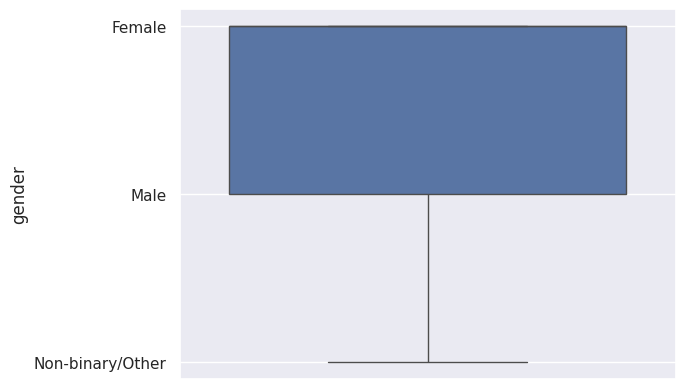

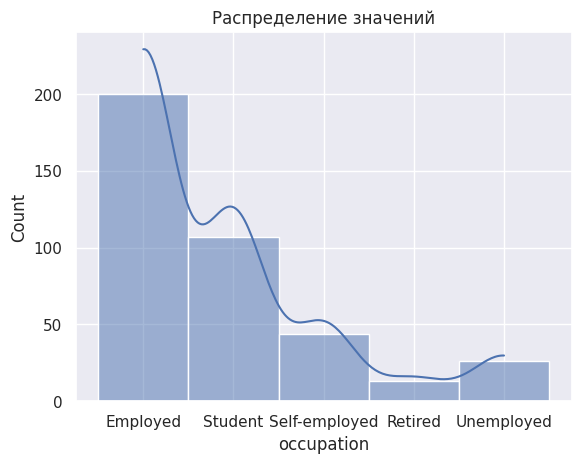

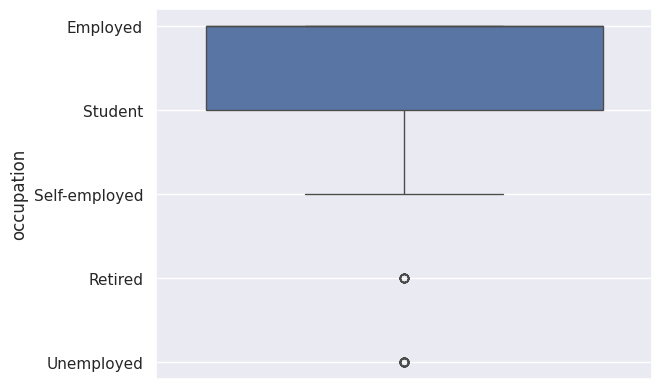

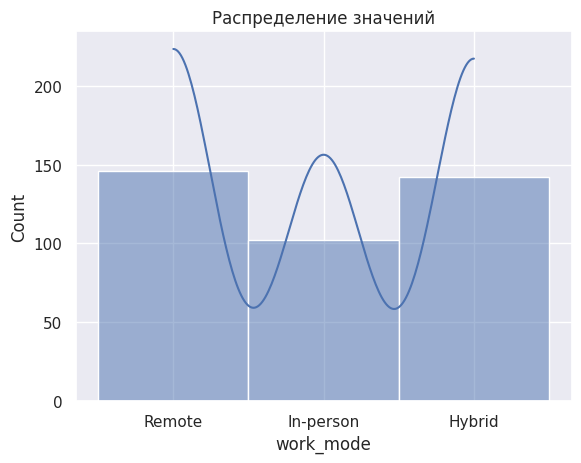

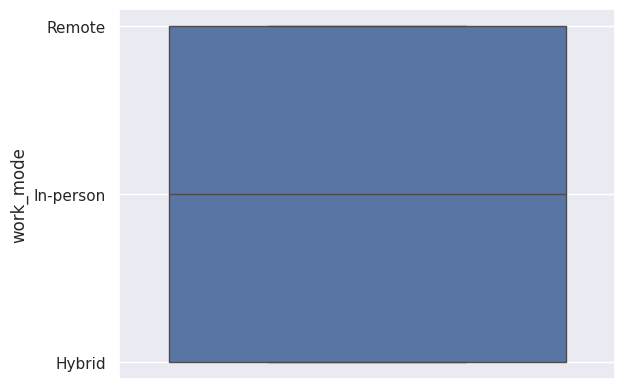

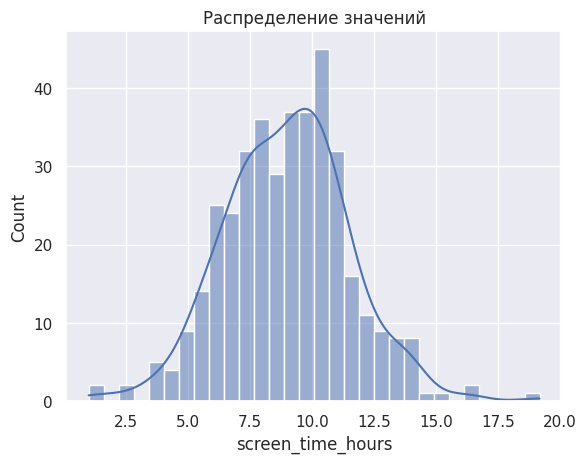

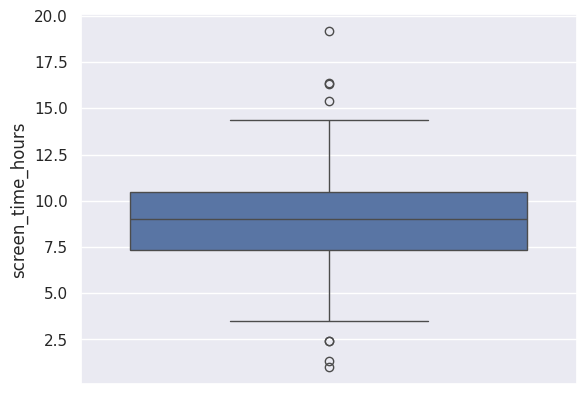

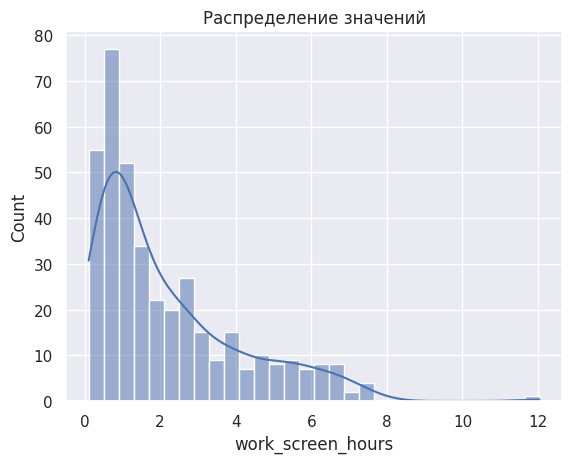

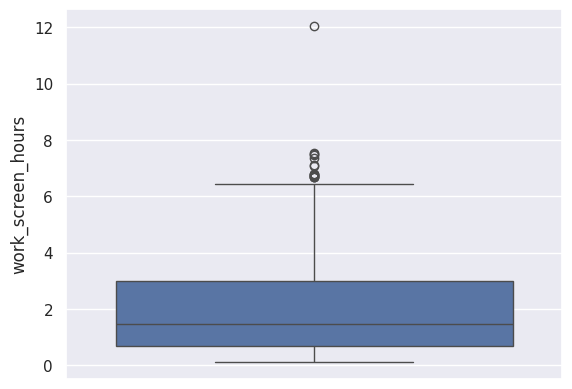

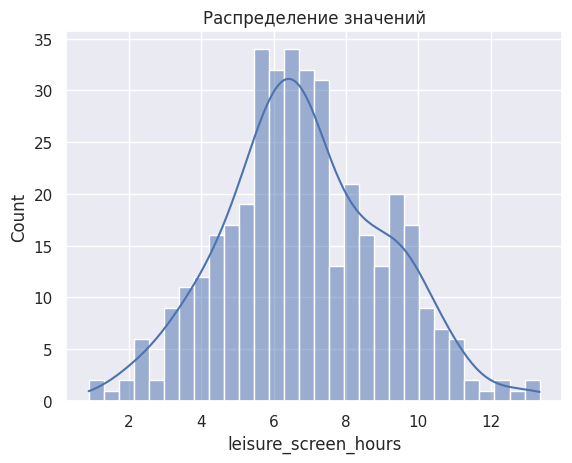

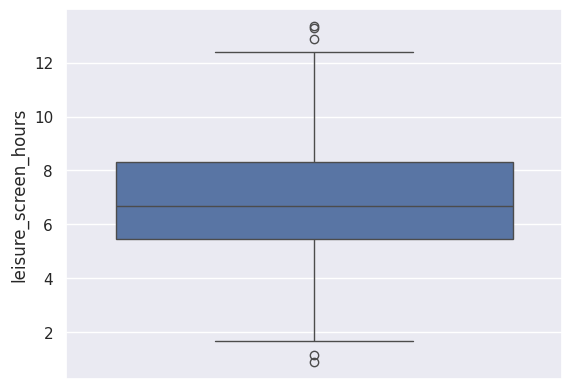

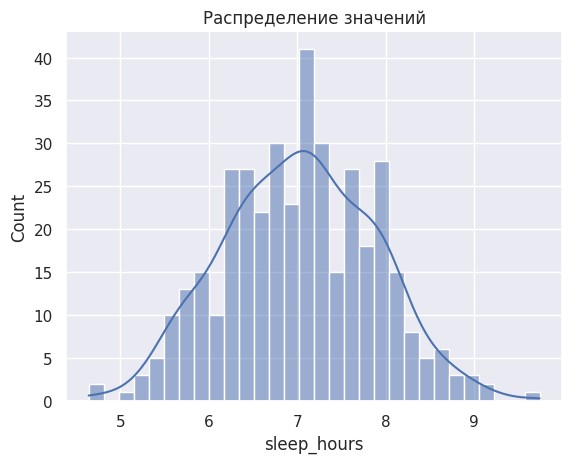

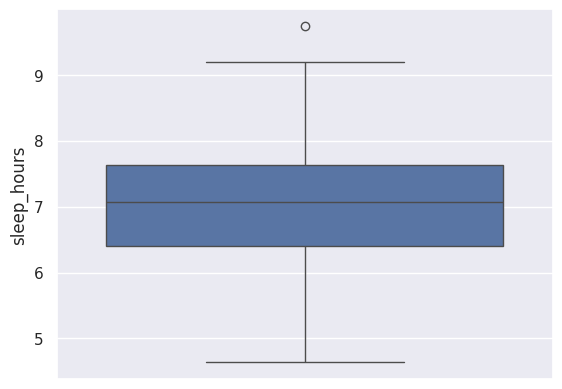

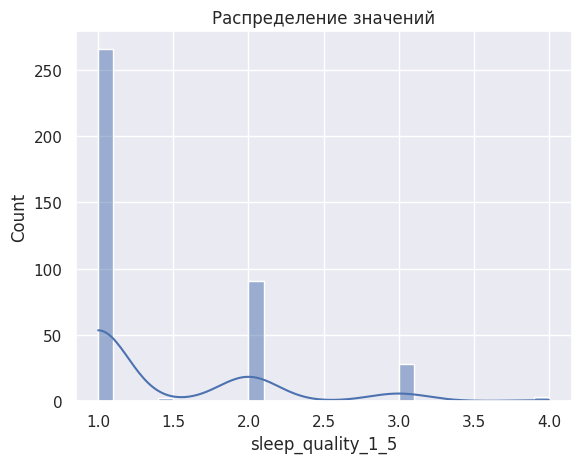

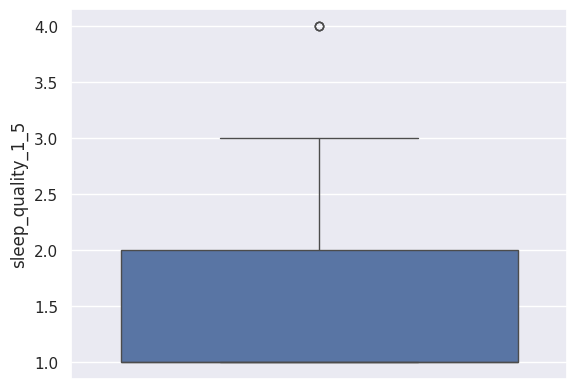

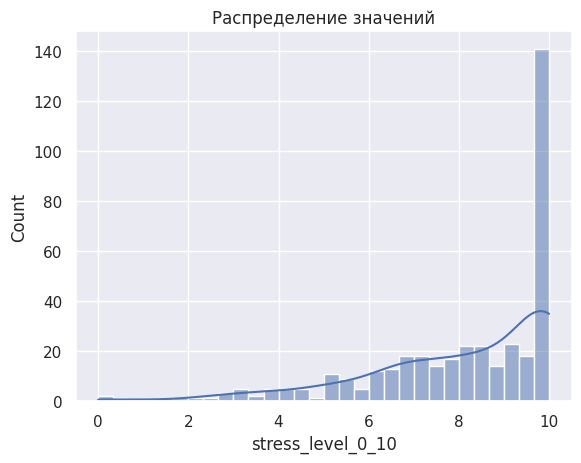

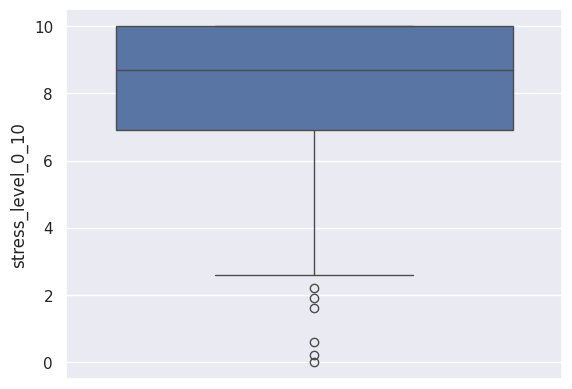

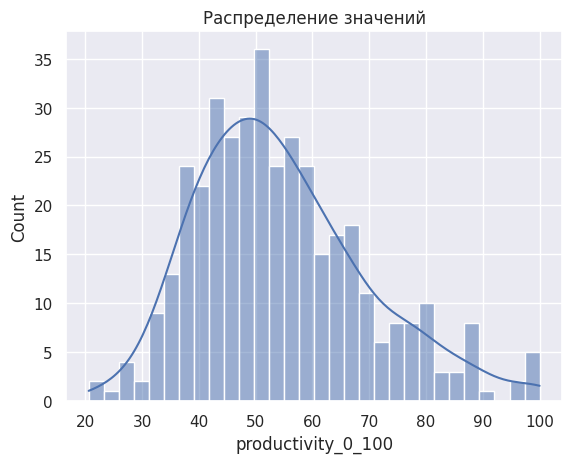

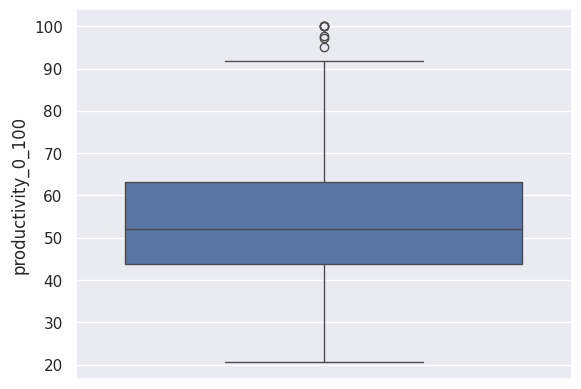

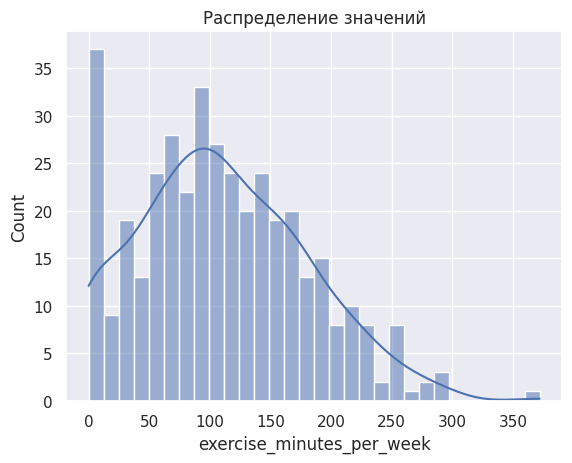

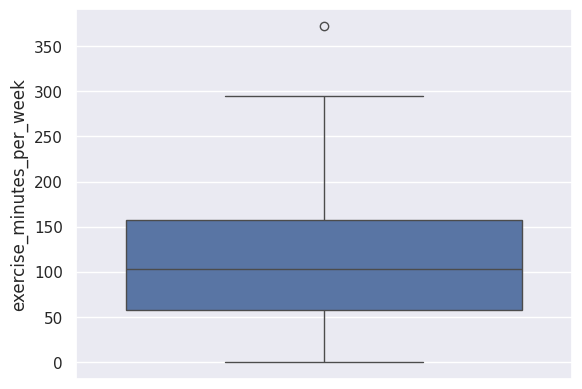

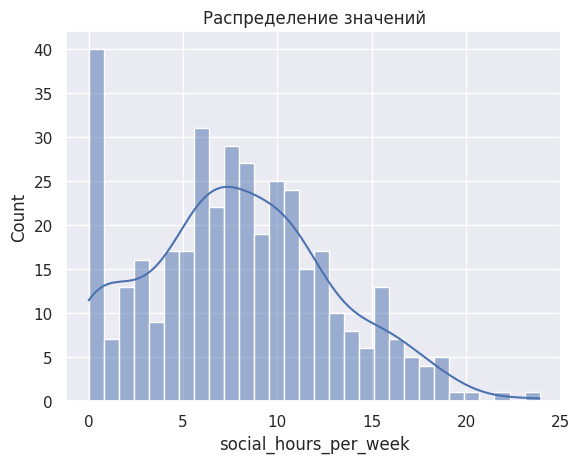

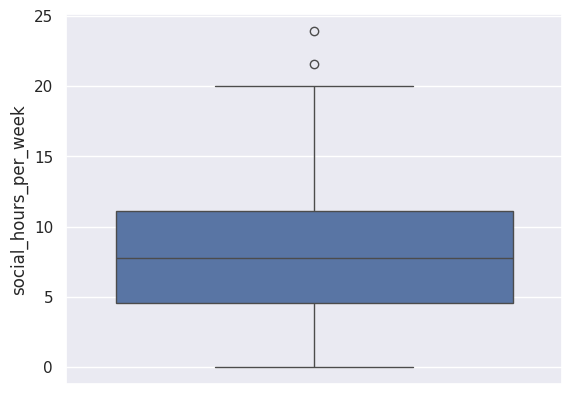

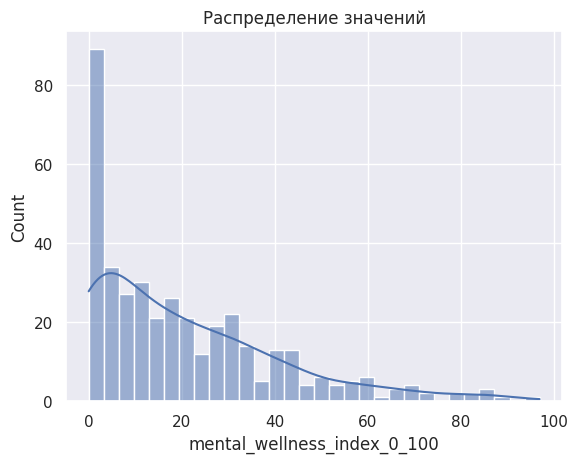

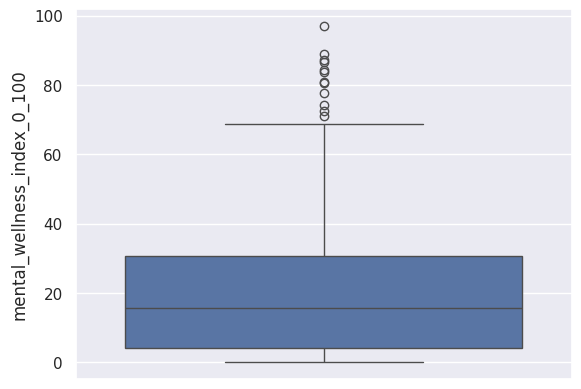

In [155]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

sns.set_theme(style="darkgrid")

# Рисуем графики, чтобы проанализировать наши данные
# Вроде всё норм, но один микро-выброс мы впоследствии удалим, чтобы показать, что умеем

for i in normal_columns:
    sns.histplot(df[i], bins=30, kde=True)
    plt.title('Распределение значений')
    plt.show()
    sns.boxplot(y = df[i])
    plt.show()


In [156]:
df[df["work_screen_hours"] > 12]



,user_id,age,gender,occupation,work_mode,screen_time_hours,work_screen_hours,leisure_screen_hours,sleep_hours,sleep_quality_1_5,stress_level_0_10,productivity_0_100,exercise_minutes_per_week,social_hours_per_week,mental_wellness_index_0_100
275,U0276,33,Female,Student,Remote,19.17,12.04,7.13,6.69,1.0,10.0,28.4,42,0.0,0.0


In [157]:
df.drop(list(df[df["work_screen_hours"] > 12].index), inplace=True)

In [158]:
df[df["work_screen_hours"] > 12] # Теперь он не показывается тут

,user_id,age,gender,occupation,work_mode,screen_time_hours,work_screen_hours,leisure_screen_hours,sleep_hours,sleep_quality_1_5,stress_level_0_10,productivity_0_100,exercise_minutes_per_week,social_hours_per_week,mental_wellness_index_0_100


In [159]:
df.to_csv("data/correct_df3.csv") # Сохраняем для следующей лабы